<a href="https://colab.research.google.com/github/aandiniidwipatricia/bike-sharing/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Andini Dwipatricia
- **Email:** aandinidiwp@gmail.com
- **ID Dicoding:**
Andini Dwipatricia

## Menentukan Pertanyaan Bisnis

- Berapa persen total penyewa registered dan penyewa casual?
- Pada bulan apa penyewaan sepeda paling banyak?
- Apakah cuaca berperan terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [100]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [101]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca dataset day.csv
- Membaca dataset hour.csv

### Assessing Data

In [102]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [103]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [104]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [105]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [106]:
print("Jumlah duplikat: ", day_df.duplicated().sum())
print("Jumlah duplikat: ", hour_df.duplicated().sum())

Jumlah duplikat:  0
Jumlah duplikat:  0


In [107]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [108]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df
-memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
- mengecek keberadaan missing value di dataset day_df
- mengecek keberadaan missing value di dataset hour_df
- memeriksa duplikasi pada masing" dataset
- memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
- memeriksa parameter statistik dari kolom numerik yang terdapat didalam hour_df

### Cleaning Data

In [109]:
# hapus tabel hour karena tidak berkaitan dengan pertanyaan bisnis
del hour_df

In [110]:
# menghapus kolom yang tidak berkaitan dengan pertanyaan bsinis
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [111]:
# ubah beberapa nama kolom, agar mudah diingat
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [112]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [113]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

In [114]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


**Insight:**
- Menghapus tabel yang tidak terlalu penting (karena isinya hampir sama)
- Mengahapus kolom yang tidak berhubungan dengan pertanyaan bisnis
- Mengubah nama kolom
- Mengubah angka menjadi keterangan
- Mengubah tipe data ke datetime
- Mengubah tipe data ke kategori
- Menampilkan hasil akhir data yang telah melewati proses cleaning

## Exploratory Data Analysis (EDA)

### Explore ...

In [115]:
#mengelompokkan penyewa sepeda berdasarkan bulan (registered dan casual)
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-115-52d2ed7b60bb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [116]:
# melihat jumlah penyewaan tiap tahun (registered dan casual)
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

<ipython-input-116-82f3bf644026>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="year").agg({


,registered,casual
,sum,sum
year,,
0,995851,247252
1,1676811,372765


In [117]:
#melihat jumlah penyewa sepeda tiap musim
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-117-364ca145f36a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [118]:
#mengelompokkan penyewa sepeda berdasarkan workingday
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-118-0159977f7090>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [119]:
#mengelompokkan penyewaan sepeda berdasarkan cuaca
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-119-131bdf635134>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

**Insight:**
- Jumlah rata-rata penyewa sepeda paling besar terdapat pada bulan Juni, sedangkan rata-rata paling kecil pada bulan Januari
- Member penyewa sepeda pada tahun 2011 berjumlah 995851 dan yang belum menjadi member sebanyak 247252, sedangkan pada tahun 2021 member berjumlah 1676811 dan non-member 372765
- Jumlah rata-rata penyewa sepeda terbanyak terdpaat pada musim gugur (fall), sedangkan rata-rata paling sedikit pada musim semi (spring)
- Jumlah penyewa sepeda paling banyak terjadi pada workingday (hari kerja)
- Penyewaan sepeda paling banyak pada saat cuaca  cerah dan mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persen total penyewa registered dan penyewa casual?

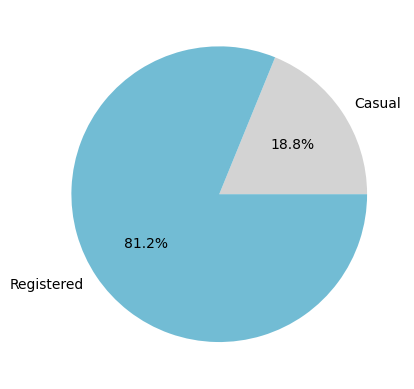

In [120]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()


### Pertanyaan 2: Pada bulan apa penyewaan sepeda paling banyak?

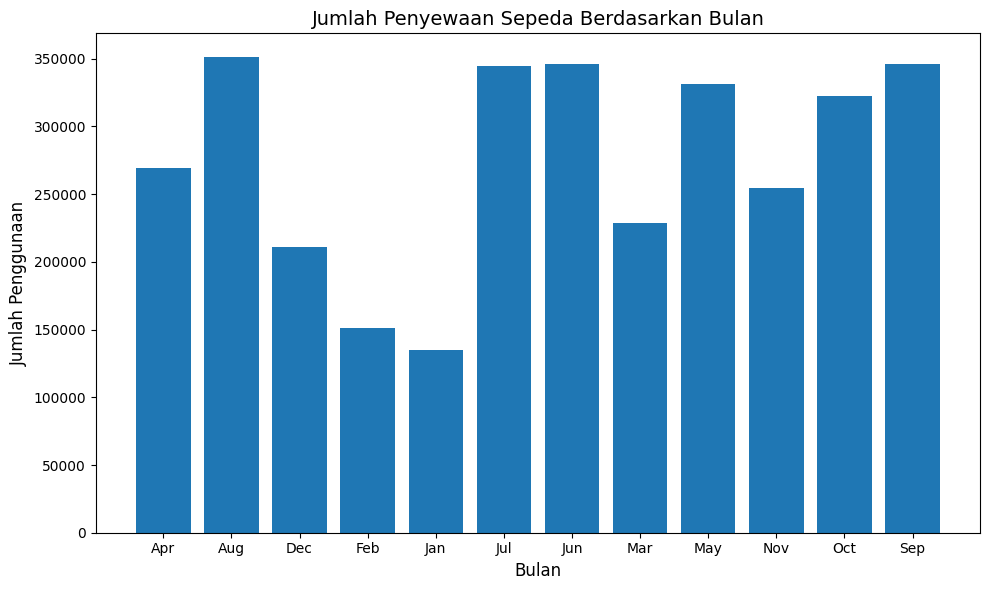

In [121]:
# Mengelompokkan data berdasarkan bulan dan menjumlahkan penggunaan registered dan casual
month_usage = day_df.groupby('month', observed=False)[['registered', 'casual']].sum().reset_index()

# Menggabungkan kolom registered dan casual menjadi satu kolom
month_usage['total_usage'] = month_usage['registered'] + month_usage['casual']

plt.figure(figsize=(10, 6))

# Membuat barplot dengan data penggunaan total (gabungan registered dan casual)
plt.bar(
    month_usage['month'],
    month_usage['total_usage'],
    color='tab:blue'  # Warna untuk total penggunaan
)

# Menambahkan label dan judul pada plot
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penggunaan', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Bulan', fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 3: Apakah cuaca berperan terhadap jumlah peminjaman sepeda?

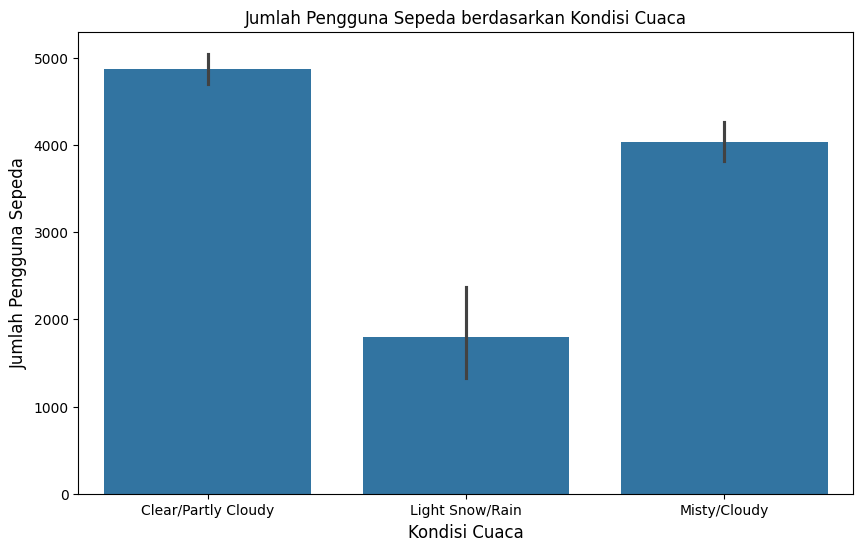

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca',fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda',fontsize=12)
plt.show()

**Insight:**
- Menampilkan total persen penyewa registered dan casual menggunakan diagram pie
- Menampilkan jumlah penyewa sepeda setiap bulan
- Menmapilkan peran cuaca terhadap jumlah penyewa sepeda

## Conclusion

- Conclution pertanyaan 1 :
Penyewa yang sudah registered sebanyak 81.2% sedangkan penyewa yang belum melakukan regsitered (casual) sebanyak 18.8%

- Conclution pertanyaan 2 :
Jumlah penyewa sepeda terbanyak terdapat pada bulan Agustus dan yang paling sedikit pada bulan Januari

- Conclution pertanyaan 3 :
Keadaan cuaca berpengaruh terhadapt jumlah penyewa sepeda. Penyewa sepeda cenderung paling banyak pada saat cuaca cerah/agak mendung (clear/party cloudly), setelah itu saat cuaca berkabut/berawan (misty/cloudy), paling sedikit pada saat salju ringan/hujan (light snow/rain).